#                                                주제 - 서울시 자동차 교통 사고량 예측 모델 
###    (날씨, 유류량, 인구, 자동차수 변수에 따른 서울시 일일 평균 교통 사고량 예측)


* Feature 값 설명

|     |    변수명           | 변수설명                    | 단위     | 특성       |
|-----|-------------------|-----------------------------|----------|------------|
| y   | accident/day      | 일 평균 교통사고수         | 수       | real       |
| x1  | taxi_driver       | 당월 일반택시 운전자수      | 명       | real       |
| x2  | gasolin           | 한 달 가솔린 소비량         | 1000배럴 | real       |
| x3  | diesel            | 한 달 디젤 소비량           | 1000배럴 | real       |
| x4  | LPG               | 한 달 LPG 소비량            | 1000배럴 | real       |
| x5  | temp              | 한 달 평균 기온             | 섭씨     | real       |
| x6  | temp_max          | 한 달 평균 최고기온         | 섭씨     | real       |
| x7  | temp_min          | 한 달 평균 최저기온         | 섭씨     | real       |
| x8  | temp_dif          | 한 달 평균 일교차           | 섭씨     | real       |
| x9  | rainfall          | 한 달 강수량               | mm       | real       |
| x10 | humidity          | 한 달 평균 습도             | %        | real       |
| x11 | humidity_min      | 한 달 평균 최저습도         | %        | real       |
| x12 | dew_point         | 한 달 평균 이슬점           | 섭씨     | real       |
| x13 | sun               | 한 달간 일조시간            | 시간     | real       |
| x14 | wind_spd_mean     | 한 달 평균 풍속             | m/s      | real       |
| x15 | wind_spd_max      | 한 달 평균 최고풍속         | m/s      | real       |
| x16 | rainfall_day      | 한 달간 강수일              | 일       | int (0~31) |
| x17 | frost             | 한 달간 서리 내린 날 수     | 일       | int (0~31) |
| x18 | fog               | 한 달간 안개낀 날 수        | 일       | int (0~31) |
| x19 | snow              | 한 달간 눈 온 날 수         | 일       | int (0~31) |
| x20 | yellow_sand       | 한 달간 황사 온 날 수       | 일       | int (0~31) |
| x21 | thunderbolts      | 한 달간 번개친 날 수        | 일       | int (0~31) |
| x22 | weather_condition | 한 달간 흐린 날 수          | 일       | int (0~31) |
| x23 | total_population  | 당월 인구수                 | 명       | int        |
| x24 | population(0~19)  | 당월 (0~19세) 인구         | 명        |  int      |
| x25 | population(20~59) | 당월 (20~59세) 인구        | 명        |  int      |
| x26 | population(60~)   | 당월 60세이상 인구수         | 명       | int        |
| x27 | total_vehicle     | 당월 자동차수               | 대       | int        |
| x28 | sedan             | 당월 승용차수               | 대       | int        |
| x29 | van               | 당월 승합차수               | 대       | int        |
| x30 | truck             | 당월 화물차수               | 대       | int        |
| x31 | special_car       | 당월 특수차수               | 대       | int        |
| x32 | bicycle           | 당월 2륜차수                | 대       | int        |

출처
1. 교통사고수 - 도로교통공단(http://taas.koroad.or.kr/web/shp/sbm/initStatsAnals.do?menuId=WEB_KMP_STA)
2. 택시운전자수 - 전국택시운송사업조합연합회(http://www.taxi.or.kr/04/01_view.php?no=95)
3. 기온 - 기상청 기상정보(http://www.kma.go.kr/weather/main.jsp) 
4. 유류량 - KOSIS(http://kosis.kr/statisticsList/statisticsList_01List.jsp?vwcd=MT_ZTITLE&parentId=I#SubCont)
5. 인구 - 서울 통계 DB 인구(http://stat.seoul.go.kr/jsp3/stat.db.jsp?cot=017&srl_dtl=10001)
6. 자동차 등록대수 - 국가지표체계(http://www.index.go.kr/potal/main/EachDtlPageDetail.do?idx_cd=1257)

# * 예측치에 대한 고민
1. 당월에 당월 사고량을 예측할 수 없음
2. 기존 데이터 y값들을 한칸 씩 내려서 전월 데이터로 당일 사고량을 예측하는 모델을 고안
3. 또 다른 방식으로 당월 데이터를 Row X 데이터들간의 관계로 예측하여서 예측용 데이터로 활용하는 방법도 생각해봄
      (이건 예측에 의한 예측이 되는거 같은데 의미가 있을까?)
4. y값 변경(기존 : 서울시 당월 전체 사고량 예측  > 변경 : 서울시 당월 일 평균 사고량 예측)
   - 한달이 각각 다른 일수를 가지기 때문에 days가 X feature값으로 들어가면 절대적인 영향력을 가짐


In [117]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.preprocessing import scale, robust_scale, minmax_scale, maxabs_scale
import matplotlib.pylab as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.decomposition import PCA

In [120]:
df1_sci = pd.read_excel('teamproject_data.xlsx', sheetname =2)
df11 = scale(df1_sci)
df1 = pd.DataFrame(data = df11, columns = df1_sci.columns)
print(df1)

    taxi_driver  gasolin/day  Diesel/day   LPG/day      temp  rainfall/day  \
0      0.261894    -0.681584    0.579235  2.176717 -1.412185     -0.573986   
1      0.274306     0.339946    0.437387  2.577366 -1.363129     -0.579949   
2      0.287282    -0.234997    0.736272  2.507881 -0.529186     -0.376452   
3      0.550181     0.859496    0.882186  1.963235  0.137969     -0.453483   
4      0.673168     0.466783    0.566148  2.389608  0.491168     -0.137447   
5      0.678246    -1.250097   -0.395706  2.109893  0.863990      0.259804   
6      0.622394    -1.021841   -0.101261  1.750935  1.217189      2.225867   
7      0.575004     0.828306    0.147382  2.442831  1.236811      0.700163   
8      0.638190     0.288148    0.084348  3.234273  0.913045     -0.111218   
9      0.813080    -1.872483    0.121209  2.342299  0.334190     -0.442478   
10     0.866112     0.485922    0.564403  1.657697 -0.499753     -0.560053   
11     1.195018     3.401499    0.965285  0.662826 -1.137474    

In [121]:
df3 = df1[['taxi_driver', 'gasolin/day', 'Diesel/day', 'LPG/day', 'temp', 'rainfall/day', 'humidity', 'dew_point', 'wind_spd_max', 'weather(5)', 'weather(weighted)', 'population(0~19)', 'population(20~59)', 'population(60~)', 'sedan', 'van', 'truck', 'special_car', 'bicycle', 'accident/day']]
print df3.head()

   taxi_driver  gasolin/day  Diesel/day   LPG/day      temp  rainfall/day  \
0     0.261894    -0.681584    0.579235  2.176717 -1.412185     -0.573986   
1     0.274306     0.339946    0.437387  2.577366 -1.363129     -0.579949   
2     0.287282    -0.234997    0.736272  2.507881 -0.529186     -0.376452   
3     0.550181     0.859496    0.882186  1.963235  0.137969     -0.453483   
4     0.673168     0.466783    0.566148  2.389608  0.491168     -0.137447   

   humidity  dew_point  wind_spd_max  weather(5)  weather(weighted)  \
0 -1.247109  -1.474496     -1.232949    1.047124           1.183833   
1 -1.731815  -1.537737     -0.295543    1.202015           1.248332   
2 -0.520049  -0.562018     -0.358037    0.272672           0.280841   
3 -1.247109  -0.146433      1.266799   -0.656671          -0.751149   
4 -0.277696   0.341427     -0.108062    0.117781          -0.235154   

   population(0~19)  population(20~59)  population(60~)     sedan       van  \
0          1.542326           1

# ===============================================

## 1. Statsmodels를 이용한 회귀 모형 분석 

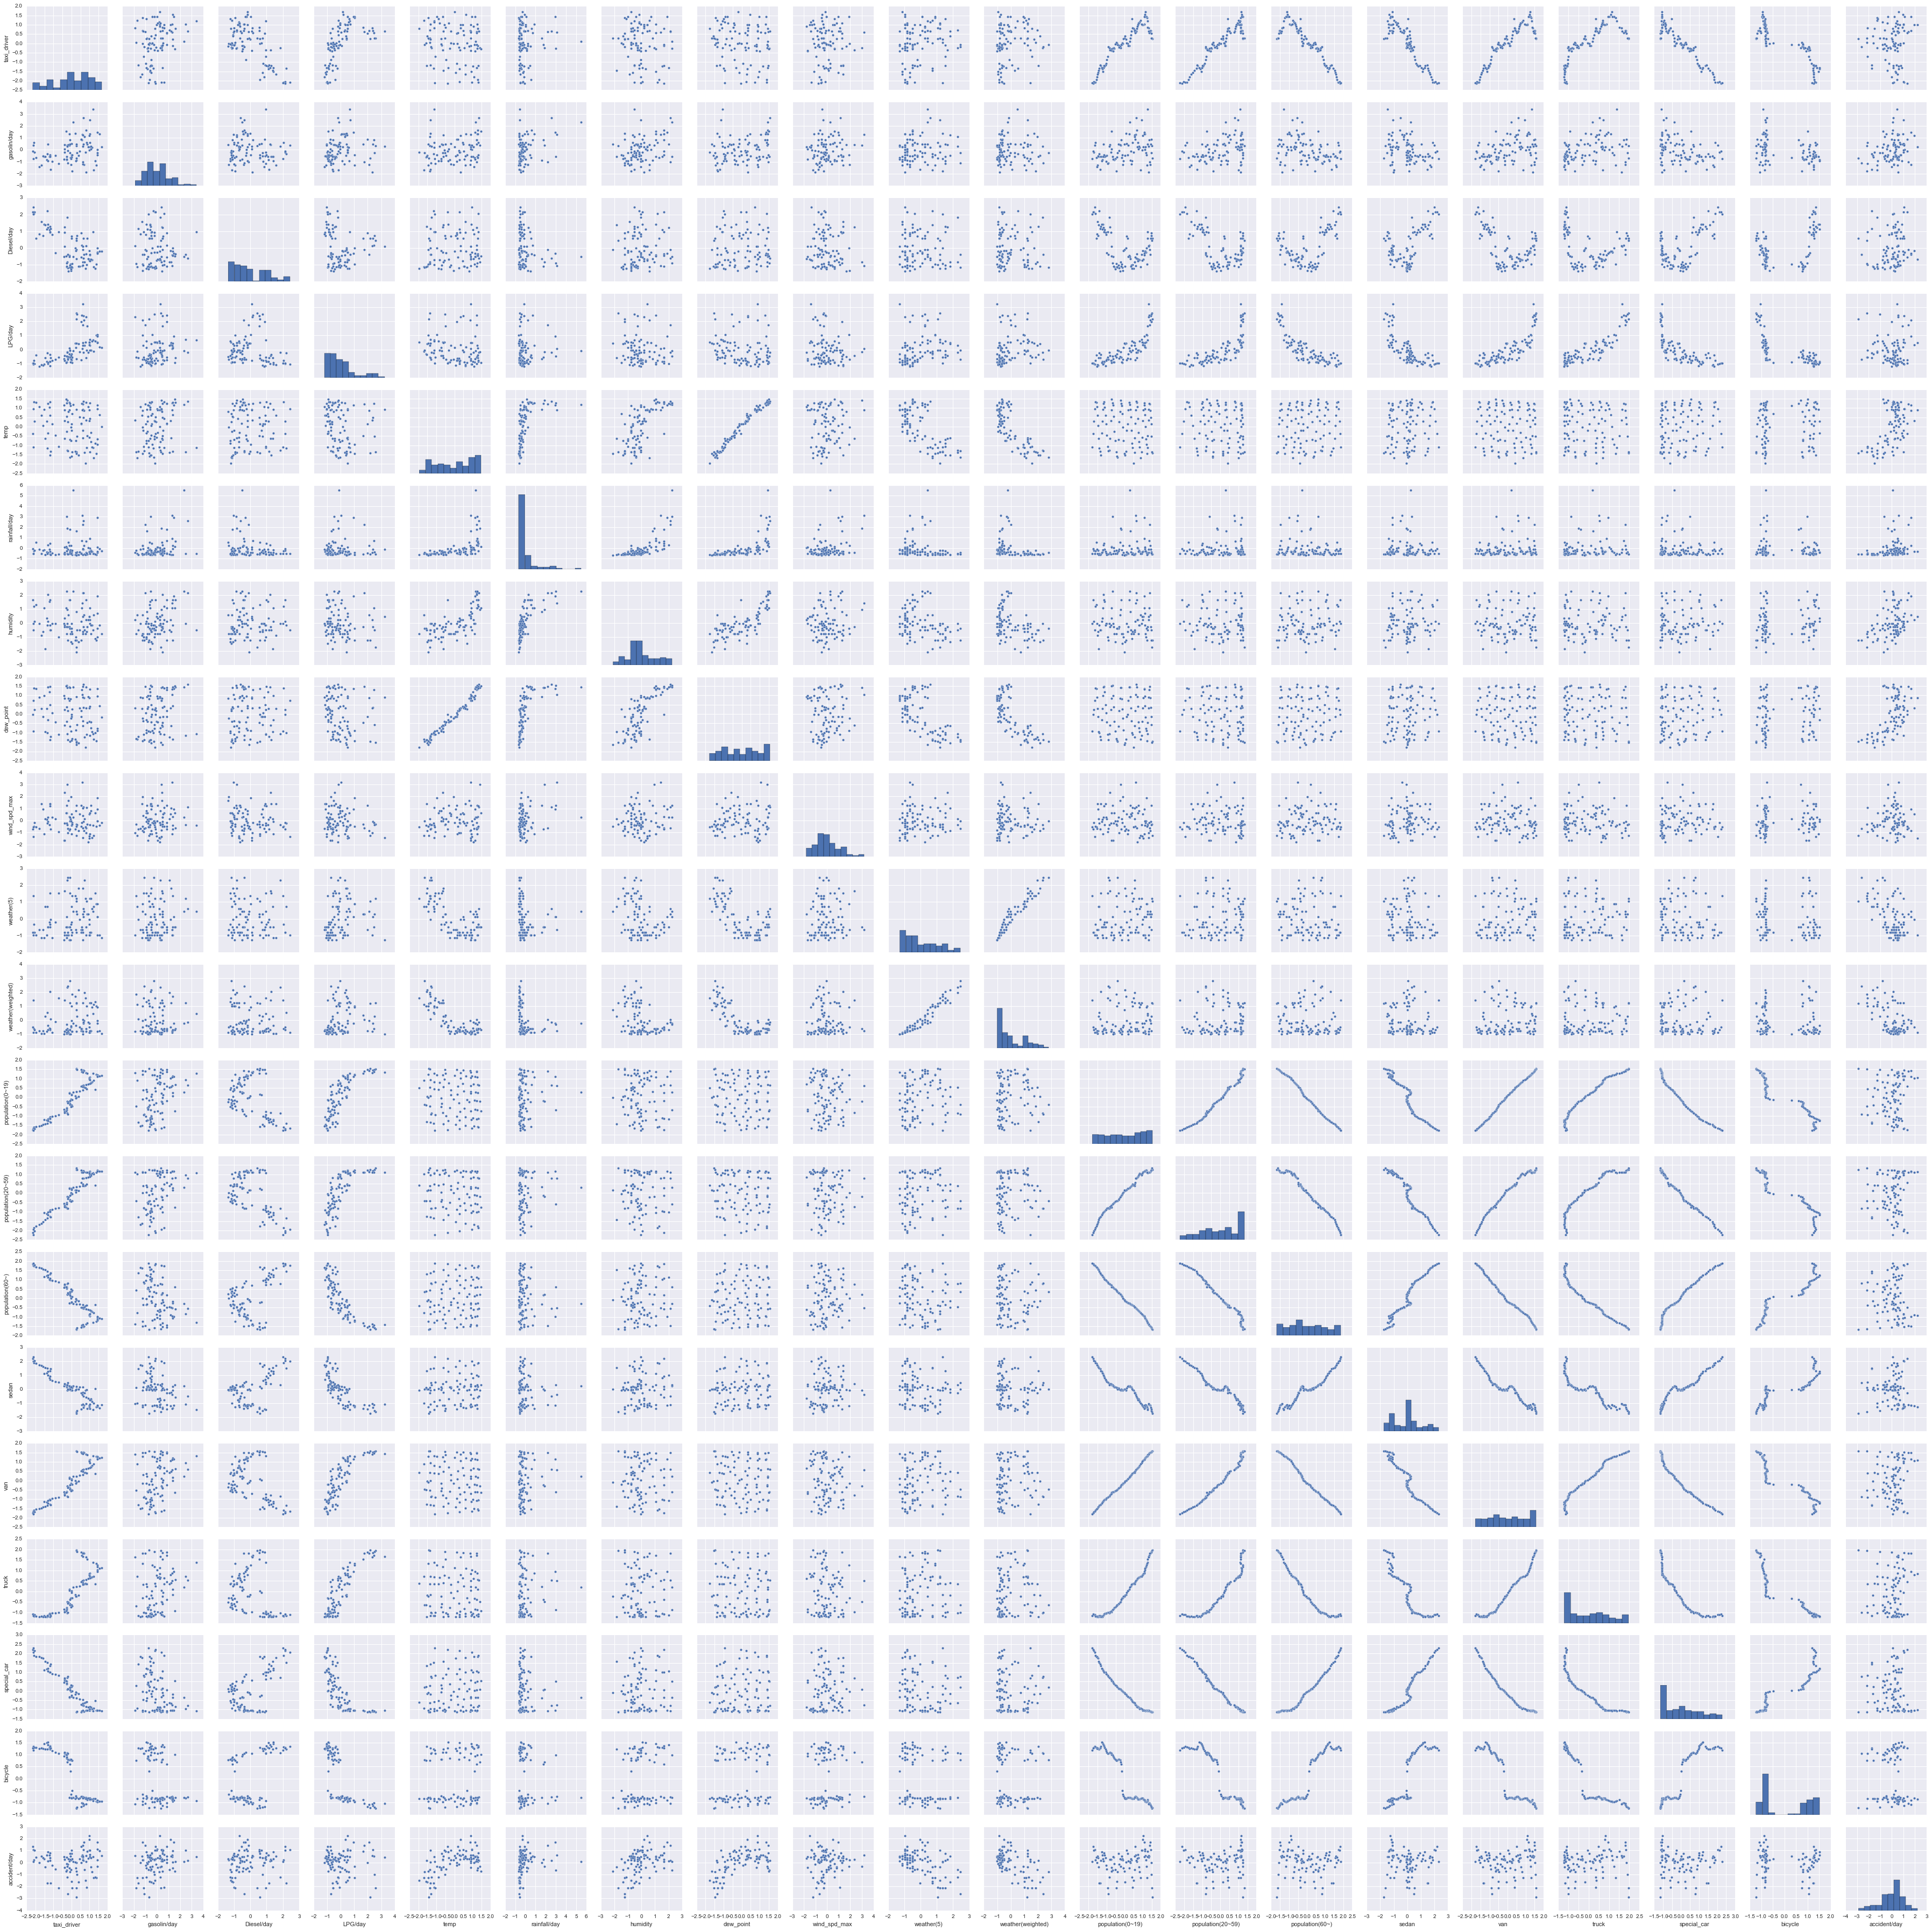

In [141]:
sns.pairplot(df3)
plt.show()

In [142]:
corr_result = df3.corr()
corr_y = corr_result['accident/day']
selected = corr_y.index[corr_y>0.1] # y값과의 corr값이 0.1이상인 feature만 선택
df3[selected[:-1]].head()

,gasolin/day,Diesel/day,temp,rainfall/day,humidity,dew_point,population(0~19),van,truck
0,-0.681584,0.579235,-1.412185,-0.573986,-1.247109,-1.474496,1.542326,1.575120,1.977237
1,0.339946,0.437387,-1.363129,-0.579949,-1.731815,-1.537737,1.507612,1.564404,1.956206
2,-0.234997,0.736272,-0.529186,-0.376452,-0.520049,-0.562018,1.487958,1.544548,1.903147
3,0.859496,0.882186,0.137969,-0.453483,-1.247109,-0.146433,1.467921,1.521098,1.861084
4,0.466783,0.566148,0.491168,-0.137447,-0.277696,0.341427,1.444586,1.509878,1.839170


In [143]:
xs_corr = df3[selected].corr() # jointplot은 발표때 
xs_corr

,gasolin/day,Diesel/day,temp,rainfall/day,humidity,dew_point,population(0~19),van,truck,accident/day
gasolin/day,1.000000,-0.071737,0.197173,0.328199,0.299480,0.234382,0.342043,0.330688,0.295001,0.276809
Diesel/day,-0.071737,1.000000,0.023993,-0.215128,0.055409,0.029079,-0.492043,-0.457639,-0.324027,0.112400
temp,0.197173,0.023993,1.000000,0.538417,0.674473,0.987867,-0.054074,-0.044468,-0.040422,0.576345
rainfall/day,0.328199,-0.215128,0.538417,1.000000,0.705628,0.600958,0.121193,0.115284,0.097027,0.204851
humidity,0.299480,0.055409,0.674473,0.705628,1.000000,0.779747,-0.045633,-0.036136,-0.039120,0.400085
dew_point,0.234382,0.029079,0.987867,0.600958,0.779747,1.000000,-0.053584,-0.043668,-0.041855,0.570338
population(0~19),0.342043,-0.492043,-0.054074,0.121193,-0.045633,-0.053584,1.000000,0.997942,0.970114,0.102741
van,0.330688,-0.457639,-0.044468,0.115284,-0.036136,-0.043668,0.997942,1.000000,0.976267,0.112691
truck,0.295001,-0.324027,-0.040422,0.097027,-0.039120,-0.041855,0.970114,0.976267,1.000000,0.124618
accident/day,0.276809,0.112400,0.576345,0.204851,0.400085,0.570338,0.102741,0.112691,0.124618,1.000000


In [144]:
for i,_ in enumerate(xs_corr.columns):
   x = xs_corr.columns[i]
   print xs_corr[x][xs_corr[x]>0.7]
   print '-------------------------'

gasolin/day    1.0
Name: gasolin/day, dtype: float64
-------------------------
Diesel/day    1.0
Name: Diesel/day, dtype: float64
-------------------------
temp         1.000000
dew_point    0.987867
Name: temp, dtype: float64
-------------------------
rainfall/day    1.000000
humidity        0.705628
Name: rainfall/day, dtype: float64
-------------------------
rainfall/day    0.705628
humidity        1.000000
dew_point       0.779747
Name: humidity, dtype: float64
-------------------------
temp         0.987867
humidity     0.779747
dew_point    1.000000
Name: dew_point, dtype: float64
-------------------------
population(0~19)    1.000000
van                 0.997942
truck               0.970114
Name: population(0~19), dtype: float64
-------------------------
population(0~19)    0.997942
van                 1.000000
truck               0.976267
Name: van, dtype: float64
-------------------------
population(0~19)    0.970114
van                 0.976267
truck               1.000000
Na

In [349]:
df_accident = sm.add_constant(df3)
df_accident.tail()

,const,taxi_driver,gasolin/day,Diesel/day,LPG/day,temp,rainfall/day,humidity,dew_point,wind_spd_max,...,weather(weighted),population(0~19),population(20~59),population(60~),sedan,van,truck,special_car,bicycle,accident/day
91,1,-2.096302,0.615645,2.058004,-0.791929,1.334922,-0.272774,1.176423,1.398456,-0.483024,...,-0.622151,-1.613251,-1.851511,1.714006,1.877699,-1.596863,-1.180719,1.896775,1.319950,0.189310
92,1,-2.097994,0.376048,2.437293,-1.037148,0.952290,-0.523966,-0.520049,0.720873,-1.357936,...,-0.880148,-1.656338,-1.942033,1.758089,1.994461,-1.637647,-1.106147,2.054997,1.346490,1.040538
93,1,-2.062452,-0.192465,2.143066,-1.010733,0.275324,-0.225846,0.085833,0.242048,-0.170556,...,-0.686650,-1.699501,-2.035776,1.797364,2.066950,-1.688139,-1.094508,2.144826,1.304818,0.993796
94,1,-2.147076,-0.107401,2.139794,-0.963819,-0.372208,-0.080769,1.661129,-0.038020,-0.732999,...,-0.493152,-1.742171,-2.115050,1.831648,2.214743,-1.728987,-1.084715,2.220364,1.264030,1.313258
95,1,-2.126766,-0.745382,2.018744,-0.975252,-1.088419,-0.511779,-0.035343,-0.932430,-0.545518,...,1.441831,-1.788798,-2.240789,1.868779,2.319998,-1.785404,-1.141226,2.281611,1.191860,0.065299


In [354]:
model_accident2 = sm.OLS(df_accident.ix[:, -1], df_accident.ix[:, :-1])
result_accident2 = model_accident2.fit()
result_accident2

In [355]:
print(result_accident2.summary())

                            OLS Regression Results                            
Dep. Variable:           accident/day   R-squared:                       0.562
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     5.123
Date:                Tue, 25 Oct 2016   Prob (F-statistic):           1.32e-07
Time:                        21:19:45   Log-Likelihood:                -96.641
No. Observations:                  96   AIC:                             233.3
Df Residuals:                      76   BIC:                             284.6
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
const              2.118e-15      0.07

# * 변수에 대한 고민
1. 월 마다 서로 다른 일수에 의해서 영향을 받는 값들에 대해서는 day(각 월의 일수)값으로 나눔
   (유류 소비량, 강수량, 사고량(y값) 등)
2. 같은 카테고리에 있고 상관계수가 높다고 판단된 데이터들은 합치거나 가중 평균을 활용하여 합치는 방법을 사용함
3. pairplot상에서 약간의 이분산성이 있다고 판단된 Feature들은 로그 값으로 변화시키고 statesmodels에서 제공하는 scaling으로 전처리 과정을 진행함



In [156]:
df1_sci_1 = pd.read_excel('teamproject_data.xlsx', sheetname =10)
df12 = scale(df1_sci_1)
df_bw = pd.DataFrame(data = df12, columns = df1_sci_1.columns)
print(df_bw)

    Diesel/day   LPG/day      temp  rainfall/day  population(0~19)     sedan  \
0     0.579235  2.176717 -1.412185     -0.573986          1.542326 -1.735758   
1     0.437387  2.577366 -1.363129     -0.579949          1.507612 -1.605735   
2     0.736272  2.507881 -0.529186     -0.376452          1.487958 -1.508212   
3     0.882186  1.963235  0.137969     -0.453483          1.467921 -1.399877   
4     0.566148  2.389608  0.491168     -0.137447          1.444586 -1.292133   
5    -0.395706  2.109893  0.863990      0.259804          1.415961 -1.151725   
6    -0.101261  1.750935  1.217189      2.225867          1.396876 -1.112818   
7     0.147382  2.442831  1.236811      0.700163          1.371382 -1.089477   
8     0.084348  3.234273  0.913045     -0.111218          1.346125 -1.062771   
9     0.121209  2.342299  0.334190     -0.442478          1.321513 -1.016764   
10    0.564403  1.657697 -0.499753     -0.560053          1.284154 -1.385738   
11    0.965285  0.662826 -1.137474     -

In [158]:
df_accident_bw = sm.add_constant(df_bw)
df_accident_bw.tail()

,const,Diesel/day,LPG/day,temp,rainfall/day,population(0~19),sedan,accident/day
91,1,2.058004,-0.791929,1.334922,-0.272774,-1.613251,1.877699,0.189310
92,1,2.437293,-1.037148,0.952290,-0.523966,-1.656338,1.994461,1.040538
93,1,2.143066,-1.010733,0.275324,-0.225846,-1.699501,2.066950,0.993796
94,1,2.139794,-0.963819,-0.372208,-0.080769,-1.742171,2.214743,1.313258
95,1,2.018744,-0.975252,-1.088419,-0.511779,-1.788798,2.319998,0.065299


In [159]:
model_accident_bw2 = sm.OLS(df_accident_bw.ix[:, -1], df_accident_bw.ix[:, :-1])
result_accident_bw2 = model_accident_bw2.fit()
result_accident_bw2

In [160]:
print(result_accident_bw2.summary())

                            OLS Regression Results                            
Dep. Variable:           accident/day   R-squared:                       0.441
Model:                            OLS   Adj. R-squared:                  0.403
Method:                 Least Squares   F-statistic:                     11.68
Date:                Thu, 27 Oct 2016   Prob (F-statistic):           1.30e-09
Time:                        19:44:56   Log-Likelihood:                -108.34
No. Observations:                  96   AIC:                             230.7
Df Residuals:                      89   BIC:                             248.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
const             2.118e-15      0.079  

## =========================================================

## 2. 아웃라이어 검사

In [145]:
result = result_accident2 # fitting 한 모델을 입력

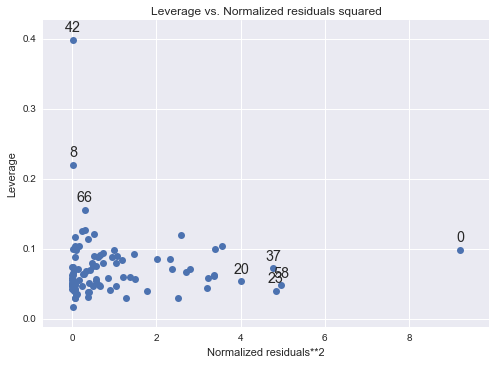

In [147]:
sm.graphics.plot_leverage_resid2(result)
plt.show()

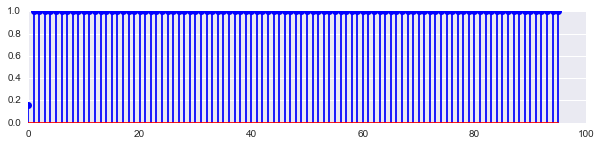

In [148]:
plt.figure(figsize=(10, 2))
plt.stem(result.outlier_test().ix[:, -1]) # 귀무가설: 이상치가 아니다
plt.show()

In [149]:
outliertest = result.outlier_test().ix[:,-1]
outliertest[outliertest<0.01]

Series([], Name: bonf(p), dtype: float64)

In [150]:
#df2.drop(df2.index[[1]]) # 이상치 없음
df2.head()

,dew_point,temp_min,temp,temp_max,raindays_d,gasolin_d,frost_d,snow_d,sedan,diesel_d
0,-1.474496,-1.354108,-1.412185,-1.488041,-1.470083,-0.681584,1.365867,0.697619,-1.735758,0.579235
1,-1.537737,-1.344345,-1.363129,-1.361787,-1.398840,0.339946,2.096371,0.840581,-1.605735,0.437387
2,-0.562018,-0.504727,-0.529186,-0.516854,0.081418,-0.234997,0.216759,0.364041,-1.508212,0.736272
3,-0.146433,0.042001,0.137969,0.221249,0.613361,0.859496,-0.702528,-0.636692,-1.399877,0.882186
4,0.341427,0.412995,0.491168,0.532029,-0.361868,0.466783,-0.702528,-0.636692,-1.292133,0.566148


## =========================================================

# 3. Lasso 모델 분석

In [53]:
df_accident_Lasso = sm.add_constant(df1)
df_accident_Lasso

,const,taxi_driver,gasolin/day,Diesel/day,LPG/day,temp,rainfall/day,humidity,dew_point,wind_spd_max,...,weather(weighted),population(0~19),population(20~59),population(60~),sedan,van,truck,special_car,bicycle,accident/day
0,1,0.261894,-0.681584,0.579235,2.176717,-1.412185,-0.573986,-1.247109,-1.474496,-1.232949,...,1.183833,1.542326,1.248645,-1.683103,-1.735758,1.575120,1.977237,-1.139035,-1.218803,-2.872821
1,1,0.274306,0.339946,0.437387,2.577366,-1.363129,-0.579949,-1.731815,-1.537737,-0.295543,...,1.248332,1.507612,1.326820,-1.632348,-1.605735,1.564404,1.956206,-1.136993,-1.228022,-2.144083
2,1,0.287282,-0.234997,0.736272,2.507881,-0.529186,-0.376452,-0.520049,-0.562018,-0.358037,...,0.280841,1.487958,1.241936,-1.591625,-1.508212,1.544548,1.903147,-1.120661,-1.201389,-1.028547
3,1,0.550181,0.859496,0.882186,1.963235,0.137969,-0.453483,-1.247109,-0.146433,1.266799,...,-0.751149,1.467921,1.235017,-1.561144,-1.399877,1.521098,1.861084,-1.131889,-1.167911,-0.010910
4,1,0.673168,0.466783,0.566148,2.389608,0.491168,-0.137447,-0.277696,0.341427,-0.108062,...,-0.235154,1.444586,1.206022,-1.530213,-1.292133,1.509878,1.839170,-1.106370,-1.132338,1.044672
5,1,0.678246,-1.250097,-0.395706,2.109893,0.863990,0.259804,0.570540,0.865424,-0.857986,...,-0.041656,1.415961,1.140376,-1.509209,-1.151725,1.497901,1.817979,-1.108411,-1.085684,1.671407
6,1,0.622394,-1.021841,-0.101261,1.750935,1.217189,2.225867,2.145835,1.479766,-0.608012,...,0.022844,1.396876,1.123805,-1.479234,-1.112818,1.481701,1.808266,-1.092079,-1.040194,1.413527
7,1,0.575004,0.828306,0.147382,2.442831,1.236811,0.700163,1.055246,1.299077,-0.170556,...,-0.622151,1.371382,1.114305,-1.441681,-1.089477,1.448922,1.725024,-1.074726,-1.023199,0.526367
8,1,0.638190,0.288148,0.084348,3.234273,0.913045,-0.111218,0.449363,0.883493,-1.420430,...,-1.009147,1.346125,1.114668,-1.406638,-1.062771,1.428624,1.656392,-1.064518,-1.035444,0.442527
9,1,0.813080,-1.872483,0.121209,2.342299,0.334190,-0.442478,0.207010,0.332392,-1.045467,...,-0.815649,1.321513,1.122715,-1.375440,-1.016764,1.407381,1.634478,-1.052268,-1.063661,0.554985


In [51]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

lasso = Lasso()
y = df_accident_Lasso.ix[:, -1]
X = df_accident_Lasso.ix[:, :-1]

lasso0 = Lasso(alpha=0.001).fit(X, y)
p0 = pd.Series(np.hstack([lasso0.intercept_, lasso0.coef_]))
lasso1 = Lasso(alpha=0.1).fit(X, y)
p1 = pd.Series(np.hstack([lasso1.intercept_, lasso1.coef_]))
lasso2 = Lasso(alpha=10).fit(X, y)
p2 = pd.Series(np.hstack([lasso2.intercept_, lasso2.coef_]))
pd.DataFrame([p0, p1, p2]).T

/usr/local/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:466: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations
  ConvergenceWarning)


,0,1,2
0,-1.443046e-15,2.152278e-15,2.109424e-15
1,0.000000e+00,0.000000e+00,0.000000e+00
2,1.367213e-01,0.000000e+00,0.000000e+00
3,9.633428e-02,1.212623e-01,0.000000e+00
4,2.262668e-01,0.000000e+00,0.000000e+00
5,-8.658038e-02,0.000000e+00,-0.000000e+00
6,3.034734e-01,0.000000e+00,0.000000e+00
7,-1.979854e-01,-0.000000e+00,0.000000e+00
8,1.663049e-01,0.000000e+00,0.000000e+00
9,0.000000e+00,1.909715e-01,0.000000e+00


In [57]:
df_accident_Lasso_after = df_accident_Lasso[['const', 'Diesel/day','wind_spd_max', 'population(0~19)','special_car','accident/day']]
df_accident_Lasso_after.head()

,const,Diesel/day,wind_spd_max,population(0~19),special_car,accident/day
0,1,0.579235,-1.232949,1.542326,-1.139035,-2.872821
1,1,0.437387,-0.295543,1.507612,-1.136993,-2.144083
2,1,0.736272,-0.358037,1.487958,-1.120661,-1.028547
3,1,0.882186,1.266799,1.467921,-1.131889,-0.010910
4,1,0.566148,-0.108062,1.444586,-1.106370,1.044672


In [58]:
model_accident_Lasso = sm.OLS(df_accident_Lasso_after.ix[:,-1], df_accident_Lasso_after.ix[:, :-1])
result_accident_Lasso = model_accident_Lasso.fit()
result_accident_Lasso

In [126]:
print result_accident_Lasso.summary()

                            OLS Regression Results                            
Dep. Variable:           accident/day   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     1.358
Date:                Thu, 27 Oct 2016   Prob (F-statistic):              0.255
Time:                        11:25:20   Log-Likelihood:                -133.44
No. Observations:                  96   AIC:                             276.9
Df Residuals:                      91   BIC:                             289.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
const             2.118e-15      0.102  

## =========================================================


# 4. Random Forest 모델 분석

In [161]:
df1_sci = pd.read_excel('teamproject_data(RF).xlsx', sheetname = 0)
del df1_sci['days']
df1 = pd.DataFrame(data = df1_sci, columns = df1_sci.columns)
df1.head()

,taxi_driver,gasolin_d,diesel_d,lpg_d,temp,temp_max,temp_min,temp_dif,rain_per_d,humidity,...,population(0~19),population(20~59),population(60~),total_vehicle,sedan,van,truck,special_car,bicycle,accident_d
0,40996,27.129032,30.806452,41.064516,-1.7,1.9,-5.0,6.9,0.570968,50,...,2243722,6670721,1287213,2946607,2361364,195238,386614,3391,401635,84.000000
1,41018,28.678571,30.107143,43.250000,-1.2,3.2,-4.9,8.1,0.535714,46,...,2238722,6678901,1294433,2952550,2367737,195068,386352,3393,401437,91.392857
2,41041,27.806452,31.580645,42.870968,7.3,11.9,3.7,8.2,1.738710,56,...,2235891,6670019,1300226,2956370,2372517,194753,385691,3409,402009,102.709677
3,41507,29.466667,32.300000,39.900000,14.1,19.5,9.3,10.2,1.283333,50,...,2233005,6669295,1304562,2960773,2377827,194381,385167,3398,402728,113.033333
4,41725,28.870968,30.741935,42.225806,17.7,22.7,13.1,9.6,3.151613,58,...,2229644,6666261,1308962,2965628,2383108,194203,384894,3423,403492,123.741935


Feature ranking:
1. feature 11 (0.139702)
2. feature 4 (0.108250)
3. feature 6 (0.108019)
4. feature 5 (0.096615)
5. feature 1 (0.053678)
6. feature 15 (0.053289)
7. feature 16 (0.046354)
8. feature 18 (0.039100)
9. feature 26 (0.023586)
10. feature 3 (0.021482)
11. feature 2 (0.021451)
12. feature 20 (0.019481)
13. feature 29 (0.017449)
14. feature 23 (0.017290)
15. feature 17 (0.017087)
16. feature 22 (0.016933)
17. feature 13 (0.016826)
18. feature 0 (0.016245)
19. feature 19 (0.016244)
20. feature 25 (0.015568)
21. feature 27 (0.015347)
22. feature 12 (0.015016)
23. feature 24 (0.014897)
24. feature 14 (0.013925)
25. feature 28 (0.013442)
26. feature 7 (0.012026)
27. feature 9 (0.011795)
28. feature 21 (0.011763)
29. feature 10 (0.010609)
30. feature 30 (0.008968)
31. feature 8 (0.007563)


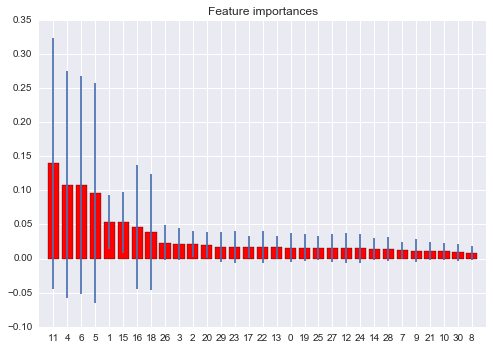

In [162]:
from sklearn.ensemble import ExtraTreesRegressor

X, y = df1.ix[:,:-1], df1.ix[:,-1]

forest = ExtraTreesRegressor(n_estimators=250, random_state=0)
forest.fit(X, y)

importances = forest.feature_importances_

std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

print("Feature ranking:")
for f in range(X.shape[1]):
   print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices], color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [163]:
a = [11,6,4,5,15,1,16,18,26,2]
df2 = pd.DataFrame(data = scale(df1[a]), columns = df1.columns[a])
df2.corr()

,dew_point,temp_min,temp,temp_max,raindays_d,gasolin_d,frost_d,snow_d,sedan,diesel_d
dew_point,1.000000,0.993323,0.987867,0.976948,0.572463,0.234382,-0.753778,-0.749882,0.077746,0.029079
temp_min,0.993323,1.000000,0.998084,0.991395,0.526125,0.215354,-0.761716,-0.779040,0.063750,0.008060
temp,0.987867,0.998084,1.000000,0.997436,0.492927,0.197173,-0.774330,-0.796029,0.077093,0.023993
temp_max,0.976948,0.991395,0.997436,1.000000,0.451275,0.169093,-0.783310,-0.813443,0.099528,0.042924
raindays_d,0.572463,0.526125,0.492927,0.451275,1.000000,0.380779,-0.391496,-0.232079,-0.034435,-0.118337
gasolin_d,0.234382,0.215354,0.197173,0.169093,0.380779,1.000000,-0.089597,-0.073931,-0.320653,-0.071737
frost_d,-0.753778,-0.761716,-0.774330,-0.783310,-0.391496,-0.089597,1.000000,0.673704,-0.032206,-0.029450
snow_d,-0.749882,-0.779040,-0.796029,-0.813443,-0.232079,-0.073931,0.673704,1.000000,-0.032645,-0.051062
sedan,0.077746,0.063750,0.077093,0.099528,-0.034435,-0.320653,-0.032206,-0.032645,1.000000,0.522581
diesel_d,0.029079,0.008060,0.023993,0.042924,-0.118337,-0.071737,-0.029450,-0.051062,0.522581,1.000000


In [164]:
fs2 = df1[['dew_point', 'temp_min','accident_d']]
df_accident = sm.add_constant(fs2)
model_accident1 = sm.OLS(df_accident.ix[:, -1], df_accident.ix[:, :-1])
result_accident1 = model_accident1.fit()
result_accident1
print(result_accident1.summary())

                            OLS Regression Results                            
Dep. Variable:             accident_d   R-squared:                       0.326
Model:                            OLS   Adj. R-squared:                  0.312
Method:                 Least Squares   F-statistic:                     22.50
Date:                Thu, 27 Oct 2016   Prob (F-statistic):           1.07e-08
Time:                        19:46:45   Log-Likelihood:                -339.70
No. Observations:                  96   AIC:                             685.4
Df Residuals:                      93   BIC:                             693.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        111.9929      3.633     30.822      0.0

In [165]:
fs3 = df1[['dew_point', 'temp_min',"temp",'accident_d']]
df_accident = sm.add_constant(fs3)
model_accident1 = sm.OLS(df_accident.ix[:, -1], df_accident.ix[:, :-1])
result_accident1 = model_accident1.fit()
result_accident1
print(result_accident1.summary())

                            OLS Regression Results                            
Dep. Variable:             accident_d   R-squared:                       0.427
Model:                            OLS   Adj. R-squared:                  0.408
Method:                 Least Squares   F-statistic:                     22.82
Date:                Thu, 27 Oct 2016   Prob (F-statistic):           3.93e-11
Time:                        19:46:47   Log-Likelihood:                -331.94
No. Observations:                  96   AIC:                             671.9
Df Residuals:                      92   BIC:                             682.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         96.5195      5.117     18.862      0.0

In [166]:
fs3 = df1[['dew_point', 'temp_min',"temp","temp_max",'accident_d']]
df_accident = sm.add_constant(fs3)
model_accident1 = sm.OLS(df_accident.ix[:, -1], df_accident.ix[:, :-1])
result_accident1 = model_accident1.fit()
result_accident1
print(result_accident1.summary())

                            OLS Regression Results                            
Dep. Variable:             accident_d   R-squared:                       0.441
Model:                            OLS   Adj. R-squared:                  0.416
Method:                 Least Squares   F-statistic:                     17.94
Date:                Thu, 27 Oct 2016   Prob (F-statistic):           6.82e-11
Time:                        19:46:48   Log-Likelihood:                -330.74
No. Observations:                  96   AIC:                             671.5
Df Residuals:                      91   BIC:                             684.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         97.4155      5.115     19.046      0.0

In [167]:
fs4 = df1[['dew_point', 'temp_min',"temp","temp_max","raindays_d","gasolin_d",'accident_d']]
df_accident = sm.add_constant(fs4)
model_accident1 = sm.OLS(df_accident.ix[:, -1], df_accident.ix[:, :-1])
result_accident1 = model_accident1.fit()
result_accident1
print(result_accident1.summary())

                            OLS Regression Results                            
Dep. Variable:             accident_d   R-squared:                       0.483
Model:                            OLS   Adj. R-squared:                  0.448
Method:                 Least Squares   F-statistic:                     13.84
Date:                Thu, 27 Oct 2016   Prob (F-statistic):           4.70e-11
Time:                        19:46:49   Log-Likelihood:                -327.00
No. Observations:                  96   AIC:                             668.0
Df Residuals:                      89   BIC:                             686.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         48.5585     18.876      2.572      0.0

In [168]:
fs4 = df1[['dew_point', 'temp_min',"temp","temp_max","raindays_d","gasolin_d","frost_d",'accident_d']]
df_accident = sm.add_constant(fs4)
model_accident1 = sm.OLS(df_accident.ix[:, -1], df_accident.ix[:, :-1])
result_accident1 = model_accident1.fit()
result_accident1
print(result_accident1.summary())

                            OLS Regression Results                            
Dep. Variable:             accident_d   R-squared:                       0.521
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     13.70
Date:                Thu, 27 Oct 2016   Prob (F-statistic):           7.28e-12
Time:                        19:46:50   Log-Likelihood:                -323.27
No. Observations:                  96   AIC:                             662.5
Df Residuals:                      88   BIC:                             683.1
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         58.2614     18.618      3.129      0.0

In [169]:
fs4 = df1[['dew_point', 'temp_min',"temp","temp_max","raindays_d","gasolin_d","frost_d","snow_d",'accident_d']]
df_accident = sm.add_constant(fs4)
model_accident1 = sm.OLS(df_accident.ix[:, -1], df_accident.ix[:, :-1])
result_accident1 = model_accident1.fit()
result_accident1
print(result_accident1.summary())

                            OLS Regression Results                            
Dep. Variable:             accident_d   R-squared:                       0.527
Model:                            OLS   Adj. R-squared:                  0.484
Method:                 Least Squares   F-statistic:                     12.12
Date:                Thu, 27 Oct 2016   Prob (F-statistic):           1.73e-11
Time:                        19:46:50   Log-Likelihood:                -322.69
No. Observations:                  96   AIC:                             663.4
Df Residuals:                      87   BIC:                             686.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         63.5428     19.311      3.291      0.0

In [208]:
fs9 = df1[['dew_point','temp_min',"temp","temp_max","raindays_d","gasolin_d","frost_d","snow_d","sedan",'accident_d']]
df_accident_RF = sm.add_constant(fs9)
model_accident1 = sm.OLS(df_accident_RF.ix[:, -1], df_accident_RF.ix[:, :-1])
result_accident1 = model_accident1.fit()
result_accident1
print(result_accident1.summary())

                            OLS Regression Results                            
Dep. Variable:             accident_d   R-squared:                       0.536
Model:                            OLS   Adj. R-squared:                  0.487
Method:                 Least Squares   F-statistic:                     11.02
Date:                Thu, 27 Oct 2016   Prob (F-statistic):           3.04e-11
Time:                        19:59:38   Log-Likelihood:                -321.82
No. Observations:                  96   AIC:                             663.6
Df Residuals:                      86   BIC:                             689.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        123.2421     51.256      2.404      0.0

R-squared 값이 낮아졌다!!  
여기서 멈추자

In [210]:
fs10 = df1[['dew_point', 'temp_min',"temp","temp_max","raindays_d","gasolin_d","frost_d","snow_d","diesel_d",'accident_d']]
df_accident = sm.add_constant(fs10)
model_accident1 = sm.OLS(df_accident.ix[:, -1], df_accident.ix[:, :-1])
result_accident1 = model_accident1.fit()
result_accident1
print(result_accident1.summary())

                            OLS Regression Results                            
Dep. Variable:             accident_d   R-squared:                       0.527
Model:                            OLS   Adj. R-squared:                  0.478
Method:                 Least Squares   F-statistic:                     10.65
Date:                Thu, 27 Oct 2016   Prob (F-statistic):           6.30e-11
Time:                        19:59:53   Log-Likelihood:                -322.69
No. Observations:                  96   AIC:                             665.4
Df Residuals:                      86   BIC:                             691.0
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         63.5791     19.633      3.238      0.0

In [138]:
fs9.corr()

,dew_point,temp_min,temp,temp_max,raindays_d,gasolin_d,frost_d,snow_d,sedan,accident_d
dew_point,1.000000,0.993323,0.987867,0.976948,0.572463,0.234382,-0.753778,-0.749882,0.077746,0.570338
temp_min,0.993323,1.000000,0.998084,0.991395,0.526125,0.215354,-0.761716,-0.779040,0.063750,0.563287
temp,0.987867,0.998084,1.000000,0.997436,0.492927,0.197173,-0.774330,-0.796029,0.077093,0.576345
temp_max,0.976948,0.991395,0.997436,1.000000,0.451275,0.169093,-0.783310,-0.813443,0.099528,0.583617
raindays_d,0.572463,0.526125,0.492927,0.451275,1.000000,0.380779,-0.391496,-0.232079,-0.034435,0.283429
gasolin_d,0.234382,0.215354,0.197173,0.169093,0.380779,1.000000,-0.089597,-0.073931,-0.320653,0.276809
frost_d,-0.753778,-0.761716,-0.774330,-0.783310,-0.391496,-0.089597,1.000000,0.673704,-0.032206,-0.624021
snow_d,-0.749882,-0.779040,-0.796029,-0.813443,-0.232079,-0.073931,0.673704,1.000000,-0.032645,-0.532416
sedan,0.077746,0.063750,0.077093,0.099528,-0.034435,-0.320653,-0.032206,-0.032645,1.000000,-0.050565
accident_d,0.570338,0.563287,0.576345,0.583617,0.283429,0.276809,-0.624021,-0.532416,-0.050565,1.000000


# ===============================================


# 5. PCA분석

Random Foreset 분석 결과 Condition No가 높게 나와서 PCA분석을 진행함

In [99]:
fs9_left = df1[["raindays_d","gasolin_d","frost_d","snow_d","sedan",'accident_d']]
fs9_left.corr()

,raindays_d,gasolin_d,frost_d,snow_d,sedan,accident_d
raindays_d,1.000000,0.380779,-0.391496,-0.232079,-0.034435,0.283429
gasolin_d,0.380779,1.000000,-0.089597,-0.073931,-0.320653,0.276809
frost_d,-0.391496,-0.089597,1.000000,0.673704,-0.032206,-0.624021
snow_d,-0.232079,-0.073931,0.673704,1.000000,-0.032645,-0.532416
sedan,-0.034435,-0.320653,-0.032206,-0.032645,1.000000,-0.050565
accident_d,0.283429,0.276809,-0.624021,-0.532416,-0.050565,1.000000


In [100]:
pca = PCA(n_components = 1)
weathers = fs9[['dew_point','temp_min','temp','temp_max']]
pca_data = pca.fit(weathers)

pca_ratio_idx = pca_data.explained_variance_ratio_

total_ratio = 0
for i in pca_ratio_idx :
  total_ratio += i

print(total_ratio)

#transform
pca = pca_data.transform(weathers)
pca2 = pca.T
pca2[0]
pca_data_t = pd.DataFrame(data=pca2[0], columns=['weathers'])
pca_data_t.tail()

0.99284893484


,weathers
91,28.331899
92,18.538251
93,5.688076
94,-5.756663
95,-21.770054


In [101]:
fs9_left.tail()

,raindays_d,gasolin_d,frost_d,snow_d,sedan,accident_d
91,0.322581,29.096774,0.000000,0.000000,2538475,115.064516
92,0.133333,28.733333,0.000000,0.000000,2544198,123.700000
93,0.225806,27.870968,0.064516,0.000000,2547751,123.225806
94,0.466667,28.000000,0.033333,0.066667,2554995,126.466667
95,0.290323,27.032258,0.354839,0.161290,2560154,113.806452


In [102]:
new_df = pd.concat([pca_data_t, fs9_left], axis=1)
new_df.tail()

,weathers,raindays_d,gasolin_d,frost_d,snow_d,sedan,accident_d
91,28.331899,0.322581,29.096774,0.000000,0.000000,2538475,115.064516
92,18.538251,0.133333,28.733333,0.000000,0.000000,2544198,123.700000
93,5.688076,0.225806,27.870968,0.064516,0.000000,2547751,123.225806
94,-5.756663,0.466667,28.000000,0.033333,0.066667,2554995,126.466667
95,-21.770054,0.290323,27.032258,0.354839,0.161290,2560154,113.806452


In [104]:
new_df.corr()

,weathers,raindays_d,gasolin_d,frost_d,snow_d,sedan,accident_d
weathers,1.000000,0.514894,0.205882,-0.770485,-0.786079,0.079779,0.575344
raindays_d,0.514894,1.000000,0.380779,-0.391496,-0.232079,-0.034435,0.283429
gasolin_d,0.205882,0.380779,1.000000,-0.089597,-0.073931,-0.320653,0.276809
frost_d,-0.770485,-0.391496,-0.089597,1.000000,0.673704,-0.032206,-0.624021
snow_d,-0.786079,-0.232079,-0.073931,0.673704,1.000000,-0.032645,-0.532416
sedan,0.079779,-0.034435,-0.320653,-0.032206,-0.032645,1.000000,-0.050565
accident_d,0.575344,0.283429,0.276809,-0.624021,-0.532416,-0.050565,1.000000


In [103]:
y, X = new_df.ix[:,-1], new_df.ix[:,:-1]
model_accident1 = sm.OLS(y,X)
result = model_accident1.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:             accident_d   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     3396.
Date:                Wed, 26 Oct 2016   Prob (F-statistic):          9.42e-104
Time:                        22:07:34   Log-Likelihood:                -330.07
No. Observations:                  96   AIC:                             672.1
Df Residuals:                      90   BIC:                             687.5
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
weathers       0.0195      0.082      0.236      0.8

# ===============================================

# 6. StratifiedKFold 검정 실시

Backward 방식으로 진행한 Single Coefficient t-test, Loss-of-Fit test 결과 값으로 검증함

1) Backward 방식 StratifiedKFold 검정

In [217]:
y_bw = df_accident_bw.ix[:, -1] 
X_bw = df_accident_bw.ix[:, :-1]

In [218]:
from sklearn.cross_validation import StratifiedKFold
cv = StratifiedKFold(y_bw, n_folds=10, shuffle = True, random_state=20)
cv

sklearn.cross_validation.StratifiedKFold(labels=[-2.87282112 -2.14408289 -1.02854671 -0.01091001  1.0446721   1.67140742
  1.41352698  0.5263674   0.44252711  0.55498545  0.93539354  0.45641216
 -1.27021026 -0.34864087  0.20520927  0.58381548  0.94609881  1.10296813
  1.66790966  0.49456956  2.22998938  1.91911255  0.99125174  1.01923383
 -1.28292939 -0.78870019 -0.39576981  0.36695425  0.66627787  0.33409649
  0.07801793  0.14797317  0.59038704  1.32767283  0.51809996 -0.61517486
 -1.4927951  -2.09479625 -1.21297415  0.18295078  0.30378255 -0.01419579
  0.06847858 -0.46890483  0.12709259  0.72033419  1.00768062  0.02078183
 -1.6454247  -0.7212042  -0.48162396  0.18623656  0.31014212  0.52795729
  0.23382732 -0.32581457  0.28152407 -0.16364561  0.74481852 -0.78688317
 -1.59772795 -2.13352147 -0.62471421 -0.1094833   0.43097389  0.47867065
 -0.6469727  -0.7423662  -0.42491782  0.24972624  0.25523786 -1.24477199
 -2.60889909 -2.11943957 -0.54839941 -0.25734323  0.38327714  0.59695859
  0

In [219]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [220]:
from sklearn.cross_validation import cross_val_score
score_bw = cross_val_score(model, X_bw, y_bw, cv = cv)
print score_bw

[ 0.49982496  0.25737046  0.3695134   0.44602234  0.13653528 -0.44474717
 -0.13153433  0.28364715  0.46609772 -0.53764019]


In [221]:
np.mean(score_bw)

0.13450896228104756

# =============================================


2) Lasoo 방식 StratifiedKFold 검정

In [222]:
y_la = df_accident_Lasso.ix[:, -1]
X_la = df_accident_Lasso.ix[:, :-1]

In [223]:
from sklearn.cross_validation import StratifiedKFold
cv = StratifiedKFold(y_la, n_folds=10, shuffle = True, random_state=20)
cv

sklearn.cross_validation.StratifiedKFold(labels=[-2.87282112 -2.14408289 -1.02854671 -0.01091001  1.0446721   1.67140742
  1.41352698  0.5263674   0.44252711  0.55498545  0.93539354  0.45641216
 -1.27021026 -0.34864087  0.20520927  0.58381548  0.94609881  1.10296813
  1.66790966  0.49456956  2.22998938  1.91911255  0.99125174  1.01923383
 -1.28292939 -0.78870019 -0.39576981  0.36695425  0.66627787  0.33409649
  0.07801793  0.14797317  0.59038704  1.32767283  0.51809996 -0.61517486
 -1.4927951  -2.09479625 -1.21297415  0.18295078  0.30378255 -0.01419579
  0.06847858 -0.46890483  0.12709259  0.72033419  1.00768062  0.02078183
 -1.6454247  -0.7212042  -0.48162396  0.18623656  0.31014212  0.52795729
  0.23382732 -0.32581457  0.28152407 -0.16364561  0.74481852 -0.78688317
 -1.59772795 -2.13352147 -0.62471421 -0.1094833   0.43097389  0.47867065
 -0.6469727  -0.7423662  -0.42491782  0.24972624  0.25523786 -1.24477199
 -2.60889909 -2.11943957 -0.54839941 -0.25734323  0.38327714  0.59695859
  0

In [224]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [225]:
from sklearn.cross_validation import cross_val_score
score_lasso = cross_val_score(model, X_la, y_la, cv = cv)
print score_lasso

[ 0.59422166 -0.06954714 -0.22626181  0.35365946  0.17609956  0.29200521
 -0.16732629  0.05137902  0.28135839 -1.37322317]


In [226]:
np.mean(score_lasso)

-0.0087635117467051993

# =============================================

3) Random Forest 방식 StratifiedKFold 검정

In [227]:
y_RF = df_accident_RF.ix[:, -1]
X_RF = df_accident_RF.ix[:, :-1]

In [228]:
from sklearn.cross_validation import StratifiedKFold
cv = StratifiedKFold(y_RF, n_folds=10, shuffle = True, random_state=20)
cv

sklearn.cross_validation.StratifiedKFold(labels=[  84.           91.39285714  102.70967742  113.03333333  123.74193548
  130.1         127.48387097  118.48387097  117.63333333  118.77419355
  122.63333333  117.77419355  100.25806452  109.60714286  115.22580645
  119.06666667  122.74193548  124.33333333  130.06451613  118.16129032
  135.76666667  132.61290323  123.2         123.48387097  100.12903226
  105.14285714  109.12903226  116.86666667  119.90322581  116.53333333
  113.93548387  114.64516129  119.13333333  126.61290323  118.4
  106.90322581   98.           91.89285714  100.83870968  115.
  116.22580645  113.          113.83870968  108.38709677  114.43333333
  120.4516129   123.36666667  113.35483871   96.4516129   105.82758621
  108.25806452  115.03333333  116.29032258  118.5         115.51612903
  109.83870968  116.          111.48387097  120.7         105.16129032
   96.93548387   91.5         106.80645161  112.03333333  117.51612903
  118.          106.58064516  105.61290323  

In [229]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [230]:
from sklearn.cross_validation import cross_val_score
score_RF = cross_val_score(model, X_RF, y_RF, cv = cv)
print score_RF

[ 0.70498133  0.25067031 -0.06100304  0.38517534  0.47336868  0.02985582
  0.31043682  0.2871951   0.40794562 -0.65245393]


In [231]:
np.mean(score_RF)

0.21361720418310015